# 1. Classificazione SoftMax

Abbiamo visto come sia possibile "trasformare" un regressore lineare in un classificatore binario utilizzando la funzione logistica. Abbiamo anche visto che è possibile implementare un classificatore multiclasse mediante il principio "one-vs-all". Tuttavia, il principio one-vs-all è poco naturale per risolvere problemi di classificazione multiclasse. Un regressore logistico ci permette di stimare la probabilità:

$$
p(c \mid x) \tag{1}
$$

dove $c$ è la classe ($c = 0$ nel caso della classe negativa e $c = 1$ nel caso della classe positiva) e $x$ è il campione in ingresso. Sappiamo inoltre che

$$
p(c = 0 \mid x) + p(c = 1 \mid x) = 1 \tag{2}
$$

per cui il un regressore logistico ci permette di stimare la distribuzione di probabilità condizionale sulle classi possibili (solo due in questo caso), dato il campione in ingresso $x$.

Supponiamo adesso di avere un problema di classificazione su $K$ classi $c = 0, c = 1, \ldots, c = K - 1$. Il principio "one-vs-all" ci permette di classificare gli elementi $x$, ma non di stimare direttamente una distribuzione di probabilità condizionale sulle classi dato il campione in ingresso mostrato di seguito:

$$
p(c \mid x) : p(c = 0 \mid x) + p(c = 1 \mid x) + \ldots + p(c = K \mid x) = 1 \tag{3}
$$

---

### Domanda 1

> A cosa può servire stimare le probabilità a posteriori $p(c \mid x)$ oltre a inferire la classe più probabile per il campione $x$ ?

Stimare le probabilità a posteriori $p(c \mid x)$ serve non solo a determinare la classe più probabile, ma offre diversi vantaggi pratici e teorici:

1. Decisioni più informate: conoscere la probabilità associata a ciascuna classe permette di valutare la confidenza del modello nella sua previsione. Ad esempio, una predizione con $p = 0.99$ è molto più affidabile di una con $p = 0.51$, anche se entrambe indicano la stessa classe più probabile.

2. Classificazione con soglie personalizzate: in problemi dove gli errori hanno costi diversi (es. medicina, finanza), le probabilità permettono di definire soglie di decisione più adatte al contesto, anziché classificare sempre in base alla massima probabilità.

3. Integrazione in sistemi complessi: le probabilità a posteriori possono essere usate in modelli probabilistici più grandi (es. reti bayesiane, modelli sequenziali) o come input in sistemi decisionali, dove è utile avere una stima di incertezza.

4. Valutazione più dettagliata dei modelli: l’uso di probabilità consente metriche più raffinate come log-loss, cross-entropy, curva ROC e AUC, e permette di verificare se il modello è ben calibrato (cioè se le probabilità stimate corrispondono a frequenze reali).

5. Combinazione di modelli: in metodi di ensemble learning o model averaging, è utile combinare probabilità (soft voting) piuttosto che semplici decisioni secche (hard voting), ottenendo spesso migliori performance.

In sintesi, stimare $p(c \mid x)$ consente un uso più flessibile, robusto e informato dei modelli di classificazione, andando ben oltre la sola scelta della classe più probabile.

---

Se volessimo ottenere una distribuzione di probabilità sulle $K$ classi, potremmo pensare di costruire un regressore lineare che, preso in input un dato, restituisce un vettore di $K$ elementi. Ciò può essere ottenuto semplicemente con una trasformazione lineare del tipo $z = Ax + b$, dove $A$ è una matrice $n \times K$, con $n$ numero di feature in ingresso. Analogamente a quanto visto nel caso del regressore logistico, tuttavia, non vi è alcuna garanzia che il vettore $z$ rappresenti una valida distribuzione di probabilità. Ricordiamo che affinché ciò accada ci serve che:

* $z_i \ge 0, \ \forall i \in \{1, \ldots, K\}$
* $\sum_{i=1}^K z_i = 1$

La funzione SoftMax è una generalizzazione della funzione logistica che ci permette di normalizzare un vettore arbitrario di numeri in modo che rispetti le due proprietà appena viste:

$$
\sigma(x_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} \tag{4}
$$

dove $z_j$ rappresenta la $j$-esima componente del vettore $z$ (e dunque $\sigma(x_j)$ rappresenta la $j$-esima componente del vettore normalizzato mediante SoftMax $\sigma(x)$).

In pratica, la funzione SoftMax esegue due operazioni:

* Applica la funzione esponenziale a tutte le componenti del vettore non normalizzato $z$. Questa operazione permette di soddisfare la prima proprietà mappando numeri $x \in [-\infty, +\infty]$ su numeri del range $[0, +\infty]$. Si noti che la funzione esponenziale è monotona crescente, per cui se $z_i \le z_j$, allora $e^{z_i} \le e^{z_j}$.
* Normalizza gli elementi del vettore in uscita dividendoli per la somma dei valori positivi $e^{z_i} \left( \frac{e^zi}{\sum{z_k}} \right)$. Questa normalizzazione ci assicura che la seconda proprietà sia rispettata: $\sum_{i=1}^K \sigma(z_i) = 1$.

### Domanda 2

> Cosa garantisce che i valori restituiti dalla funzione SoftMax siano non negativi? Disegnare la funzione esponenziale per rispondere alla domanda.

I valori restituiti dalla funzione SoftMax sono sempre non negativi perché la funzione applica, come primo passo, l’esponenziale a ciascun elemento del vettore $z$. La funzione esponenziale $f(z) = e^z$ ha la proprietà fondamentale di essere sempre positiva per ogni valore reale di $z$, cioè:

$$
e^z > 0 \quad \text{per ogni } z \in \mathbb{R}
$$

Questo significa che, anche se un componente $z_j$ è negativo, $e^{z_j}$ sarà comunque positivo (sebbene molto vicino a zero per valori molto negativi). La SoftMax calcola poi:

$$
\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}
$$

dove:

* Il numeratore $e^{z_j}$ è positivo;
* Il denominatore è una somma di termini $e^{z_k}$, tutti positivi, quindi positivo anch’esso.

Essendo quindi il rapporto tra due numeri positivi, ogni componente della SoftMax è strettamente positiva (cioè maggiore di zero), e dunque non negativa. Inoltre, la normalizzazione garantisce che la somma dei valori sia uguale a 1, rendendo il vettore un’autentica distribuzione di probabilità.

La forma della funzione esponenziale giustifica questo comportamento:
![grafico](/Users/vincenzovillanova/Desktop/ML/grafico.jpg)

Come mostra il grafico, la funzione $e^z$ è sempre positiva e monotona crescente, motivo per cui la SoftMax può garantire che tutti i valori siano non negativi e sommati diano 1.

---

La formulazione del regressore SoftMax è dunque la seguente:

$$
f(x) = \sigma(Ax + b) = \sigma(z) = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}} \tag{5}
$$

dove $z = Ax + b$, la funzione $f$ stima la probabilità a posteriori che $x$ appartenga ad una data classe:

$$
p(c = i \mid x) = f(x)_i \tag{6}
$$

e $f(x)_i$ indica la i-esima componente del vettore di probabilità ottenuto mediante il regressore softmax $f$.

Per allenare il regressore softmax, utilizziamo una generalizzazione della loss vista nel caso del regressore logistico: la cross entropy loss.
In teoria dell’informazione, la cross entropy tra due distribuzioni di probabilità $p$ e $q$ è definita come:

$$
H(p, q) = -\sum_x p(x) \log q(x) \tag{7}
$$

La cross entropy $H(p, q)$ indica il numero medio di bit necessario per identificare eventi $x$ che seguono la probabilità $p$ se li descriviamo con la probabilità stimata $q$.
La cross entropy raggiunge il suo minimo quando $p$ e $q$ sono uguali. In tal caso la cross entropy corrisponde all’entropia di $p$:

$$
H(p) = -\sum_x p(x) \log p(x) \tag{8}
$$

Nel nostro caso, la probabilità $q$ è data dal regressore softmax, mentre $p$ rappresenta la probabilità “ideale” che il campione $x$ appartenga a una data classe.
Dato che conosciamo le classi di appartenenza di ogni campione, la probabilità ideale è data da una rappresentazione di tipo "one-hot-vector", in cui $p(x) = \mathbf{y}$ e y ha una unica componente $y_j = 1$, mentre tutte le altre sono nulle.
Ad esempio, se le classi sono tre e il campione appartiene alla seconda classe ($c = 1$), allora $\mathbf{y} = [0, 1, 0]$.

---

### Domanda 3

> I vettori "one-hot" sono delle valide distribuzioni di probabilità?

Sì, i vettori one-hot sono valide distribuzioni di probabilità perché soddisfano le due condizioni fondamentali: tutte le componenti sono non negative e la loro somma è pari a 1. Rappresentano una distribuzione deterministica, in cui tutta la probabilità è assegnata a una sola classe.

---

Possiamo dunque scrivere la loss relativa a un dato campione $x$ di etichetta one-hot $\mathbf{y}$ come segue:

$$
L_\theta(x, \mathbf{y}) = -\sum_i y_i \log f(x)_i \tag{9}
$$


Notiamo che $\mathbf{y}_i$ sarà uguale a zero tranne che per $i = j$, dove $j$ è la classe del campione $\mathbf{x}$.
Pertanto, solo uno dei termini della sommatoria nella formula sopra sarà non nullo.
Ciò ci permette di riscrivere la loss come segue:

$$
L_\theta(x, j) = -\log f(x)_j \tag{10}
$$

Dove $j$ è la classe di $\mathbf{x}$. Ricordando che $f(x) = \sigma(Ax + b) = \sigma(z) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$, possiamo riscrivere la loss come:

$$
L_\theta(x, j) = -\log \left( \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} \right) = \log \sum_{k=1}^K e^{z_k} - \log e^{z_j} \tag{11}
$$

da cui, ricordando che $\mathbf{z} = A\mathbf{x} + \mathbf{b}$, abbiamo:

$$
L_\theta(x, j) = \log \sum_{k=1}^K e^{z_k} - z_j \tag{12}
$$

# 1.1 Implementazione di un Regressore Softmax

In [349]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

# Features
print(X.shape)

# Classi Target
print(Y.shape)

print(Y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [350]:
# Impostimo un seed per avere risultati ripetibili

import torch
import numpy as np

np.random.seed(1234)
torch.random.manual_seed(1234)

In [351]:
idx = np.random.permutation(len(X))

In [352]:
X = X[idx]
Y = Y[idx]

In [353]:
from torch import Tensor

X_training = Tensor(X[30:])
Y_training = Tensor(Y[30:])
X_testing = Tensor(X[:30])
Y_testing = Tensor(Y[:30])

In [354]:
X_mean = X_training.mean(0)
X_std = X_training.std(0)

X_training_norm = (X_training - X_mean) / X_std
X_testing_norm = (X_testing - X_mean) / X_std

In [355]:
from torch import nn


class SoftMaxRegressor(nn.Module):
    def __init__(self, in_features, out_classes):
        super(SoftMaxRegressor, self).__init__()
        self.linear = nn.Linear(in_features, out_classes)

    def forward(self, x):
        scores = self.linear(x)
        return scores

In [356]:
model = SoftMaxRegressor(4, 3)  # 4 feature in ingresso e 3 classi in uscita
model(X_training_norm)[:10]

tensor([[ 0.9326,  0.6582, -0.2940],
        [-0.1301, -0.2885,  0.1746],
        [ 1.1440,  1.6170, -1.0236],
        [-0.1766, -0.4061,  0.2196],
        [-0.4706, -0.5166,  0.2307],
        [ 1.2162,  1.5326, -0.9408],
        [ 1.6219,  1.6549, -0.9210],
        [ 0.8984,  1.2598, -0.8457],
        [ 1.4105,  1.9569, -1.2018],
        [ 1.0097,  0.5520, -0.2012]], grad_fn=<SliceBackward0>)

In [357]:
softmax = nn.Softmax(dim=1)  # 1 perché per righe
softmax(model(X_training_norm))[:10]

tensor([[0.4870, 0.3701, 0.1428],
        [0.3116, 0.2659, 0.4225],
        [0.3678, 0.5902, 0.0421],
        [0.3048, 0.2423, 0.4529],
        [0.2518, 0.2405, 0.5077],
        [0.4020, 0.5516, 0.0465],
        [0.4734, 0.4893, 0.0372],
        [0.3831, 0.5499, 0.0670],
        [0.3571, 0.6167, 0.0262],
        [0.5180, 0.3277, 0.1543]], grad_fn=<SliceBackward0>)

In [358]:
softmax(model(X_training_norm)).sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

# Domanda 4 
Perché è stata calcolata la funzione softmax per righe? 

La funzione softmax è calcolata per righe (`dim=1`) perché ogni riga rappresenta un campione, e la softmax deve restituire una distribuzione di probabilità sulle classi per ciascun campione. In questo modo, i valori di ogni riga vengono normalizzati affinché sommino a 1, interpretandoli come probabilità che il campione appartenga a ciascuna classe.


In [359]:
# La funziona max restituisce i valori dei massimi e i loro indici (il risultato della funzione argmax)
# per questo includiamo "[1]" nell'equazione successiva

preds = softmax(model(X_training_norm)).max(1)[1]
preds

tensor([0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0,
        1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1])

In [360]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_training, preds))

0.35833333333333334


In [361]:
preds_logits = model(X_training_norm).argmax(1)
print(preds_logits)
print((preds_logits == preds))

tensor([0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0,
        1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1])
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, T

In pratica, si preferisce dunque non applicare la funzione softmax per il calcolo delle etichette predette.

La procedura di training del regressore logistico sarà la seguente:

1. Normalizzare i dati in ingresso x;
2. Costruire il modulo che implementa il modello (il costruttore si preoccuperà di inizializzare i parametri);
3. Mettere il modello in modalità "training";
4. Calcolare l'output del modello ŷ;
5. Calcolare il valore della loss ℒₜₕₑₜₐ(x, y);
6. Calcolare il gradiente della loss rispetto ai parametri del modello;
7. Aggiornare i pesi θ utilizzando il gradient descent;
8. Ripetere i passi 4–7 fino a convergenza.

Implementiamo la procedura includendo il monitoring delle curve mediante tensorboard e il calcolo dell'accuracy ad ogni iterazione.

In [362]:
from torch.utils.tensorboard import SummaryWriter
from torch.optim import SGD

writer = SummaryWriter("logs/softmax_regressor")

lr = 0.01
epochs = 500


means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training - means) / stds
X_testing_norm = (X_testing - means) / stds

model = SoftMaxRegressor(4, 3)

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr)

for e in range(epochs):
    model.train()
    out = model(X_training_norm)
    l = criterion(out, Y_training.long())
    l.backward()
    writer.add_scalar("loss/train", l.item(), global_step=e)
    optimizer.step()
    optimizer.zero_grad()

    preds_train = out.max(1)[1]
    writer.add_scalar(
        "accuracy/train", accuracy_score(Y_training, preds_train), global_step=e
    )

    model.eval()
    with torch.set_grad_enabled(False):
        out = model(X_testing_norm)
        l = criterion(out, Y_testing.long())
        writer.add_scalar("loss/test", l.item(), global_step=e)
        preds_test = out.max(1)[1]
        writer.add_scalar(
            "accuracy/test", accuracy_score(Y_testing, preds_test), global_step=e
        )

In [363]:
preds_train = model(X_training_norm).max(1)[1]
preds_test = model(X_testing_norm).max(1)[1]
print("Accurancy di training ", accuracy_score(Y_training, preds_train))
print("Accurancy di testing ", accuracy_score(Y_testing, preds_test))

Accurancy di training  0.8666666666666667
Accurancy di testing  0.9333333333333333


# 2. Datasets, Data Loaders, Stochastic Gradient Descent, Salvataggio e Caricamento dei modelli

Inizialmente, il gradiente viene calcolato sull'intero dataset (Batch Gradient Descent), ma questo approccio può diventare impraticabile per dataset molto grandi. Per ovviare al problema, si utilizza lo Stochastic Gradient Descent (SGD), che suddivide i dati in mini-batch e calcola il gradiente su uno alla volta. Come esempio, viene introdotto il dataset MNIST, composto da 70.000 immagini di cifre scritte a mano (28×28 pixel), suddivise in 60.000 per il training e 10.000 per il test.

In [364]:
from torchvision.datasets import MNIST

mnist_train = MNIST(
    root="data", train=True, download=True
)  # Train=True indica che vogliamo caricare il training set
mnist_test = MNIST(root="data", train=False, download=True)

In [365]:
print("Numero di campioni di training: ", len(mnist_train))
print("Numero di campioni di testing: ", len(mnist_test))

Numero di campioni di training:  60000
Numero di campioni di testing:  10000


In [366]:
print(mnist_train[0])
print(mnist_test[0])

print(type(mnist_train[0][0]))
print(type(mnist_train[0][1]))

# Il primo parametro è un immagine il secondo l'etichetta corrispondente

(<PIL.Image.Image image mode=L size=28x28 at 0x3488C26A0>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x3488C2730>, 7)
<class 'PIL.Image.Image'>
<class 'int'>


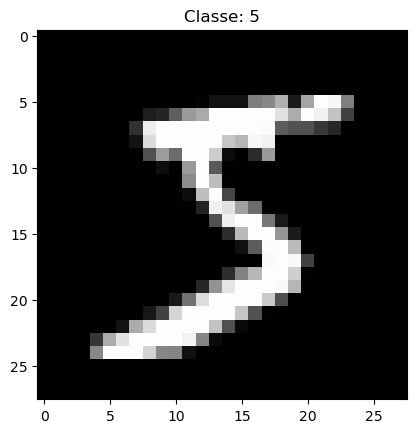

In [367]:
from matplotlib import pyplot as plt

plt.imshow(mnist_train[0][0], cmap="gray")
plt.title("Classe: " + str(mnist_train[0][1]))
plt.show()

In [368]:
im = torch.from_numpy(np.array(mnist_train[0][0]))
im.shape

torch.Size([28, 28])

In [369]:
from torchvision import transforms

mnist_train = MNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()
)
mnist_test = MNIST(
    root="data", train=False, download=True, transform=transforms.ToTensor()
)

In [370]:
sample = mnist_train[0]
print(type(sample[0]))
print(type(sample[1]))

<class 'torch.Tensor'>
<class 'int'>


In [371]:
print(mnist_train[0][0].shape)

torch.Size([1, 28, 28])


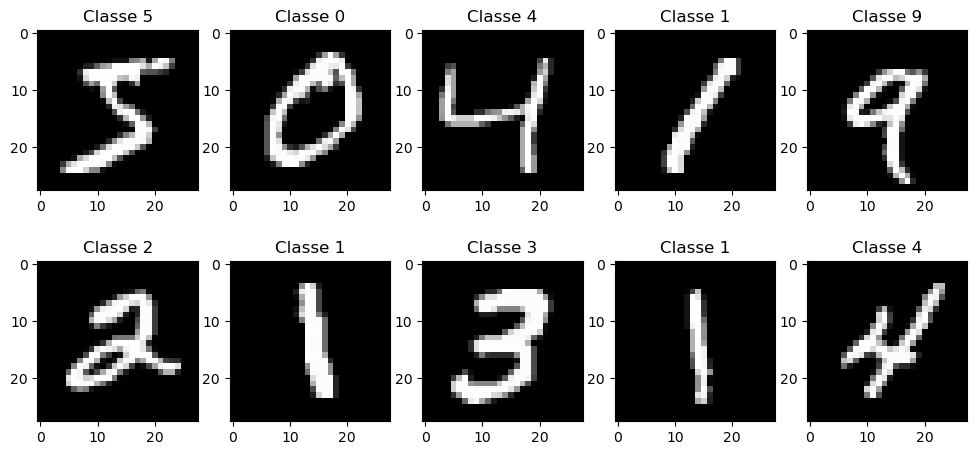

In [372]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5.5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title("Classe %d" % mnist_train[i][1])
    plt.imshow(mnist_train[i][0].squeeze().numpy(), cmap="gray")

In [373]:
# Normalizziamo i dati in modo che abbiano media nulla e deviazione standard pari a 1

m = 0

for sample in mnist_train:
    m += sample[0].sum()

m = m / (len(mnist_train) * 28 * 28)

s = 0

for sample in mnist_train:
    s += ((sample[0] - m) ** 2).sum()

s = np.sqrt(s / (len(mnist_train) * 28 * 28))

In [374]:
print("Mean: %0.4f" % m)
print("Std: %0.4f" % s)

Mean: 0.1307
Std: 0.3081


In [375]:
sample = (mnist_train[15][0] - m) / s
print("Minimo:", sample.min())
print("Massimo:", sample.max())
print("Media:", sample.mean())
print("Deviazione Standard:", sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Deviazione Standard: tensor(0.9860)


In [376]:
# Possibile non farlo a mano nel seguente modo:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((m,), (s,))]
)
mnist_train = MNIST(root="data", train=True, download=True, transform=transform)
mnist_test = MNIST(root="data", train=False, download=True, transform=transform)

In [377]:
sample = mnist_train[15][0]
print("Minimo:", sample.min())
print("Massimo:", sample.max())
print("Media:", sample.mean())
print("Deviazione Standard:", sample.std())

Minimo: tensor(-0.4241)
Massimo: tensor(2.8215)
Media: tensor(-0.0134)
Deviazione Standard: tensor(0.9860)


In [378]:
sample = sample.view(-1)
print(sample.shape)

torch.Size([784])


In [379]:
# Creiamo una funzione custom


def custom_transf(x):
    return x.view(-1)


transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((m,), (s,)),
        transforms.Lambda(custom_transf),
    ]
)
mnist_train = MNIST(root="data", train=True, download=True, transform=transform)
mnist_test = MNIST(root="data", train=False, download=True, transform=transform)

In [380]:
print(mnist_train[0][0].shape)
print(mnist_train[0][1])

torch.Size([784])
5


### 2.2 Data Loader

Ogni campione ottenuto mediante l'oggetto dataset MNIST verrà automaticamente normalizzato e trasformato in un vettore. 
Per effettuare l'ottimizzazione mediante Stochastic Gradient Descent, dobbiamo suddividere i campioni in mini-batch. 

Inoltre, è importante fornire i campioni in ordine casuale, in quanto fornire consecutivamente elementi con caratteristiche simili 
(es. stessa classe) favorirebbe l'overfitting.

PyTorch ci permette di gestire il "batching" in automatico e in maniera multithread mediante l'oggetto DataLoader. 

Utilizziamo un batch size di 256 immagini e due thread paralleli per velocizzare il caricamento dei dati: